In [1]:
import requests
import pandas as pd
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 글꼴 설정 (MacOS의 경우 AppleGothic)
plt.rcParams['font.family'] = 'AppleGothic'

# 경고 방지 (음수 값도 제대로 표시)
plt.rcParams['axes.unicode_minus'] = False

# 적용 확인
print("설정된 글꼴:", plt.rcParams['font.family'])


설정된 글꼴: ['AppleGothic']


In [2]:
# API 정보 설정
api_key = 'RW7AN1D6X8RT99OH6AKT'

# KeyStatisticList 엔드포인트를 사용하여 주요 통계 지표 조회
url = f"https://ecos.bok.or.kr/api/KeyStatisticList/{api_key}/json/kr/1/100"

# API 호출
response = requests.get(url)

# 응답 확인 및 데이터 처리
if response.status_code == 200:
    data = response.json()
    
    # 데이터가 존재하는지 확인
    if 'KeyStatisticList' in data:
        records = data['KeyStatisticList']['row']
        
        # 데이터프레임으로 변환
        df = pd.DataFrame(records)
        
        # 데이터 출력
        print(df)
    else:
        print("데이터를 가져올 수 없습니다.")
else:
    print(f"API 요청 실패: {response.status_code}")


   CLASS_NAME   KEYSTAT_NAME DATA_VALUE     CYCLE   UNIT_NAME
0        시장금리      한국은행 기준금리       3.25  20241122          % 
1        시장금리       콜금리(익일물)      3.271  20241121          % 
2        시장금리   KORIBOR(3개월)       3.41  20241122          % 
3        시장금리     CD수익률(91일)       3.44  20241122          % 
4        시장금리  통안증권수익률(364일)      2.812  20241122          % 
..        ...            ...        ...       ...         ...
95     부동산 가격       주택매매가격지수       96.3    202409  2021.6=100
96     부동산 가격       주택전세가격지수       93.4    202409  2021.6=100
97     부동산 가격    지가변동률(전기대비)      0.194    202409          % 
98    국제원자재가격      Duba유(현물)      76.07    202410       달러/배럴
99    국제원자재가격              금    2689.13    202410         달러 

[100 rows x 5 columns]


In [5]:
df['KEYSTAT_NAME'].unique()

array(['한국은행 기준금리', '콜금리(익일물)', 'KORIBOR(3개월)', 'CD수익률(91일)',
       '통안증권수익률(364일)', '국고채수익률(3년)', '국고채수익률(5년)', '회사채수익률(3년,AA-)',
       '예금은행 수신금리', '예금은행 대출금리', '예금은행총예금(말잔)', '예금은행대출금(말잔)', '가계신용',
       '가계대출연체율', 'M1(협의통화, 평잔)', 'M2(광의통화, 평잔)', 'Lf(평잔)', 'L(말잔)',
       '원/달러 환율(종가)', '원/엔(100엔) 환율(매매기준율)', '원/유로 환율(매매기준율)',
       '원/위안 환율(종가)', '코스피지수', '코스닥지수', '주식거래대금(KOSPI)', '투자자예탁금',
       '채권거래대금', '국고채발행액', '경제성장률(실질, 계절조정 전기대비)',
       '민간소비증감률(실질, 계절조정 전기대비)', '설비투자증감률(실질, 계절조정 전기대비)',
       '건설투자증감률(실질, 계절조정 전기대비)', '재화의 수출 증감률(실질, 계절조정 전기대비)',
       'GDP(명목, 계절조정)', '1인당GNI', '총저축률', '국내총투자율', '수출입의 대 GNI 비율',
       '전산업생산지수', '제조업생산지수', '제조업출하지수', '제조업재고지수', '제조업가동률지수', '서비스업생산지수',
       '도소매업생산지수', '소매판매액지수', '개인신용카드사용액', '자동차판매액지수', '설비투자지수',
       '설비용 기계류내수출하지수', '국내기계수주액', '건설기성액', '건축허가면적', '건설수주액', '건축착공면적',
       '동행지수순환변동치', '선행지수순환변동치', '전산업 기업심리지수실적', '소비자심리지수', '경제심리지수',
       '제조업매출액증감률', '제조업매출액세전순이익률', '제조업부채비율', '가구당월평균소득', '평균소비성향',
     

In [7]:
df.to_csv('Keystats.csv')

In [59]:

# 현재 날짜와 3년 전 날짜 계산
end_date = datetime.now()
start_date = end_date - timedelta(days=3*365)

# 날짜를 API 형식 (YYYYMM)으로 변환
end_date_str = end_date.strftime('%Y%m')
start_date_str = start_date.strftime('%Y%m')

# KeyStatisticList 엔드포인트를 사용하여 주요 통계 지표 조회
url = f"https://ecos.bok.or.kr/api/StatisticSearch/{api_key}/json/kr/1/100/901Y067/M/{start_date_str}/{end_date_str}/I16E"

# API 호출
response = requests.get(url)

# 필요한 열만 선택
if response.status_code == 200:
    data = response.json()
    
    # 데이터가 존재하는지 확인
    if 'StatisticSearch' in data:
        records = data['StatisticSearch']['row']
        
        # 데이터프레임으로 변환
        df = pd.DataFrame(records)
        
        # 필요한 칼럼만 선택 (TIME, DATA_VALUE)
        df_filtered = df[['TIME', 'DATA_VALUE']]
        
        # 데이터 출력
        print(df_filtered)
    else:
        print("데이터를 가져올 수 없습니다.")
else:
    print(f"API 요청 실패: {response.status_code}")


      TIME DATA_VALUE
0   202111      101.3
1   202112      101.2
2   202201      101.2
3   202202      100.9
4   202203      100.7
5   202204      100.5
6   202205      100.6
7   202206      100.7
8   202207      100.4
9   202208      100.3
10  202209      100.3
11  202210      100.3
12  202211      100.1
13  202212       99.6
14  202301       99.3
15  202302         99
16  202303       98.8
17  202304       98.6
18  202305       98.7
19  202306       99.1
20  202307       99.4
21  202308       99.4
22  202309       99.6
23  202310       99.8
24  202311      100.1
25  202312      100.2
26  202401      100.2
27  202402      100.4
28  202403      100.2
29  202404      100.5
30  202405      100.5
31  202406      100.7
32  202407      100.7
33  202408      100.6
34  202409      100.6


In [81]:
df_filtered.to_csv('leadingIndex.csv')
leading_index_data = df_filtered


In [9]:
leading_index_data = pd.read_csv('leadingIndex.csv')

In [61]:

# API URL
url = "http://data-dbg.krx.co.kr/svc/apis/idx/kospi_dd_trd"

# 인증키 설정 (본인의 인증키로 대체)
auth_key = '956087495A1D4769A88B0F3411D0890EF02445EB'

# 헤더 작성
headers = {
    "AUTH_KEY": auth_key,
}

# 어제 기준으로 1년 전부터 어제까지 날짜 계산
end_date = (datetime.today() - timedelta(days=1)).strftime('%Y%m%d')
start_date = (datetime.today() - timedelta(days=365*3)).strftime('%Y%m%d')

# 결과 저장용 DataFrame
all_data = pd.DataFrame()

# 날짜별 데이터를 가져오기 위한 루프
current_date = datetime.strptime(start_date, '%Y%m%d')
while current_date.strftime('%Y%m%d') <= end_date:
    # 기준일자 설정
    bas_dd = current_date.strftime('%Y%m%d')
    
    # 요청 파라미터
    params = {
        "basDd": bas_dd,
    }
    
    # API 요청
    response = requests.get(url, headers=headers, params=params)
    
    # 응답 확인 및 데이터 처리
    if response.status_code == 200:
        data = response.json()
        if 'OutBlock_1' in data and data['OutBlock_1']:
            temp_df = pd.DataFrame(data['OutBlock_1'])
            all_data = pd.concat([all_data, temp_df], ignore_index=True)
            print(f"데이터 가져오기 성공: {bas_dd}")
        else:
            print(f"데이터 없음: {bas_dd}")
    else:
        print(f"Error {response.status_code} on {bas_dd}: {response.text}")
    
    # 다음 날짜로 이동
    current_date += timedelta(days=1)


데이터 가져오기 성공: 20211125
데이터 가져오기 성공: 20211126
데이터 없음: 20211127
데이터 없음: 20211128
데이터 가져오기 성공: 20211129
데이터 가져오기 성공: 20211130
데이터 가져오기 성공: 20211201
데이터 가져오기 성공: 20211202
데이터 가져오기 성공: 20211203
데이터 없음: 20211204
데이터 없음: 20211205
데이터 가져오기 성공: 20211206
데이터 가져오기 성공: 20211207
데이터 가져오기 성공: 20211208
데이터 가져오기 성공: 20211209
데이터 가져오기 성공: 20211210
데이터 없음: 20211211
데이터 없음: 20211212
데이터 가져오기 성공: 20211213
데이터 가져오기 성공: 20211214
데이터 가져오기 성공: 20211215
데이터 가져오기 성공: 20211216
데이터 가져오기 성공: 20211217
데이터 없음: 20211218
데이터 없음: 20211219
데이터 가져오기 성공: 20211220
데이터 가져오기 성공: 20211221
데이터 가져오기 성공: 20211222
데이터 가져오기 성공: 20211223
데이터 가져오기 성공: 20211224
데이터 없음: 20211225
데이터 없음: 20211226
데이터 가져오기 성공: 20211227
데이터 가져오기 성공: 20211228
데이터 가져오기 성공: 20211229
데이터 가져오기 성공: 20211230
데이터 없음: 20211231
데이터 없음: 20220101
데이터 없음: 20220102
데이터 가져오기 성공: 20220103
데이터 가져오기 성공: 20220104
데이터 가져오기 성공: 20220105
데이터 가져오기 성공: 20220106
데이터 가져오기 성공: 20220107
데이터 없음: 20220108
데이터 없음: 20220109
데이터 가져오기 성공: 20220110
데이터 가져오기 성공: 20220111
데이터 가져오기 성공: 202201

In [63]:

# 최종 데이터 확인 및 저장
if not all_data.empty:
    print("데이터 조회 완료")
    print(all_data.head())
    # 필요 시 CSV로 저장
    all_data.to_csv("kospi_3year_data.csv", index=False, encoding="utf-8-sig")
else:
    print("조회된 데이터가 없습니다.")


데이터 조회 완료
     BAS_DD IDX_CLSS       IDX_NM CLSPRC_IDX CMPPREVDD_IDX FLUC_RT OPNPRC_IDX  \
0  20211125    KOSPI  코스피 (외국주포함)          -             -       -          -   
1  20211125    KOSPI          코스피    2980.27        -14.02   -0.47    2996.74   
2  20211125    KOSPI      코스피 200     391.93         -3.47   -0.88     395.67   
3  20211125    KOSPI      코스피 100    2957.47        -26.05   -0.87    2985.63   
4  20211125    KOSPI       코스피 50    2746.77        -22.08   -0.80    2772.12   

  HGPRC_IDX LWPRC_IDX ACC_TRDVOL     ACC_TRDVAL            MKTCAP  
0         -         -  595969686  9401090529106  2199950623164321  
1   2996.74   2973.24  595400439  9395229842711  2198127835486776  
2    395.73    391.69  117213378  6741120432411  1859801460699150  
3   2985.63   2955.67   76973142  5469265243866  1686375132653600  
4   2772.12   2744.25   41908092  4364973969636  1474079278909900  


In [11]:
all_data = pd.read_csv('kospi_3year_data.csv')

In [19]:
# 코스피 데이터만 필터링하고 필요한 열 선택
kospi_data = all_data[(all_data['IDX_NM'] == '코스피')][['BAS_DD', 'CLSPRC_IDX']]

# 열 이름을 이해하기 쉽게 변경
kospi_data = kospi_data.rename(columns={
    'BAS_DD': 'DATE',        # 날짜
    'CLSPRC_IDX': 'CLOSE'    # 종가
})

# 데이터 저장
kospi_data.to_csv("kospi_filtered.csv", index=False, encoding="utf-8-sig")

# 필터링된 데이터 출력
kospi_data


,DATE,CLOSE
1,20211125,2980.27
48,20211126,2936.44
95,20211129,2909.32
142,20211130,2839.01
189,20211201,2899.72
...,...,...
34311,20241115,2416.86
34358,20241118,2469.07
34405,20241119,2471.95
34452,20241120,2482.29


상관관계 분석 결과:
3개월 후 3개월: 0.4376
3개월 후 4개월: 0.4809
3개월 후 5개월: 0.4611
3개월 후 6개월: 0.4886


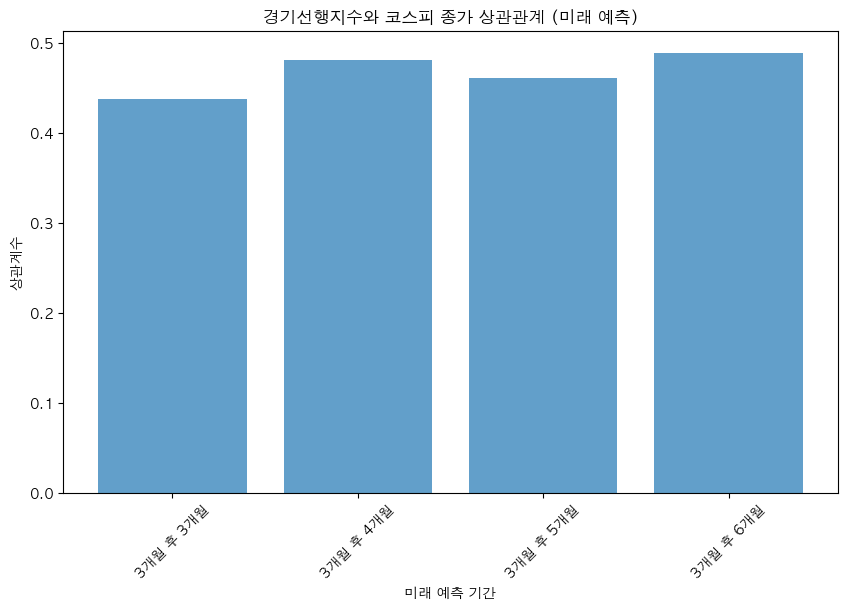

In [21]:
import matplotlib.pyplot as plt

# 1. 데이터 전처리: 코스피 데이터
# 날짜를 문자열에서 datetime으로 변환
kospi_data['DATE'] = pd.to_datetime(kospi_data['DATE'], format='%Y%m%d')
# 종가를 float로 변환
kospi_data['CLOSE'] = pd.to_numeric(kospi_data['CLOSE'], errors='coerce')
# 날짜와 종가만 필터링
kospi_ts = kospi_data[['DATE', 'CLOSE']].dropna()

# 2. 데이터 전처리: 경기선행지수 데이터
# 날짜를 문자열에서 datetime으로 변환
leading_index_data['TIME'] = pd.to_datetime(leading_index_data['TIME'], format='%Y%m')
# 날짜와 데이터 값만 필터링
leading_index_ts = leading_index_data[['TIME', 'DATA_VALUE']]

# 3. 3개월, 4개월, 5개월, 6개월 후 코스피 종가 추가
future_months = [3, 4, 5, 6]
for months in future_months:
    kospi_ts[f'CLOSE_{months}M'] = kospi_ts['CLOSE'].shift(-months)

# 4. 데이터 병합 (경기선행지수와 코스피 데이터를 날짜 기준으로 병합)
merged_data = pd.merge(
    leading_index_ts,
    kospi_ts,
    left_on='TIME',
    right_on='DATE',
    how='inner'
).drop(columns=['DATE'])

# 5. 상관관계 계산
correlation_results = {}
for months in future_months:
    correlation = merged_data['DATA_VALUE'].corr(merged_data[f'CLOSE_{months}M'])
    correlation_results[f'3개월 후 {months}개월'] = correlation

# 결과 출력
print("상관관계 분석 결과:")
for key, value in correlation_results.items():
    print(f"{key}: {value:.4f}")

# 6. 상관관계 시각화
plt.figure(figsize=(10, 6))
plt.bar(correlation_results.keys(), correlation_results.values(), alpha=0.7)
plt.title("경기선행지수와 코스피 종가 상관관계 (미래 예측)")
plt.ylabel("상관계수")
plt.xlabel("미래 예측 기간")
plt.xticks(rotation=45)
plt.show()


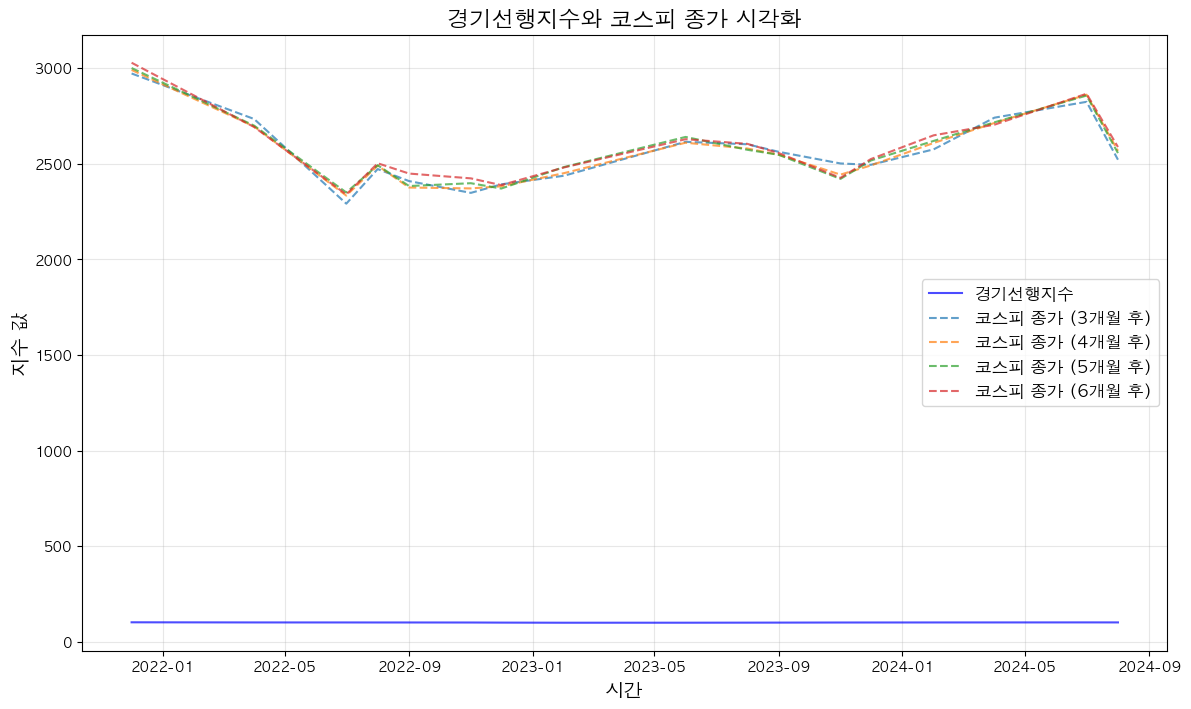

In [23]:
import matplotlib.pyplot as plt

# 1. 데이터 준비: 병합된 데이터 사용
# 시간 축 기준으로 정렬 (안 되어 있을 경우 대비)
merged_data = merged_data.sort_values(by="TIME")

# 2. 시각화
plt.figure(figsize=(14, 8))

# 경기선행지수 시각화
plt.plot(merged_data['TIME'], merged_data['DATA_VALUE'], label='경기선행지수', color='blue', alpha=0.7)

# 코스피 종가 시각화 (3개월, 4개월, 5개월, 6개월 후 종가)
for months in [3, 4, 5, 6]:
    plt.plot(
        merged_data['TIME'], 
        merged_data[f'CLOSE_{months}M'], 
        label=f'코스피 종가 ({months}개월 후)', 
        linestyle='--', alpha=0.7
    )

# 그래프 꾸미기
plt.title("경기선행지수와 코스피 종가 시각화", fontsize=16)
plt.xlabel("시간", fontsize=14)
plt.ylabel("지수 값", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


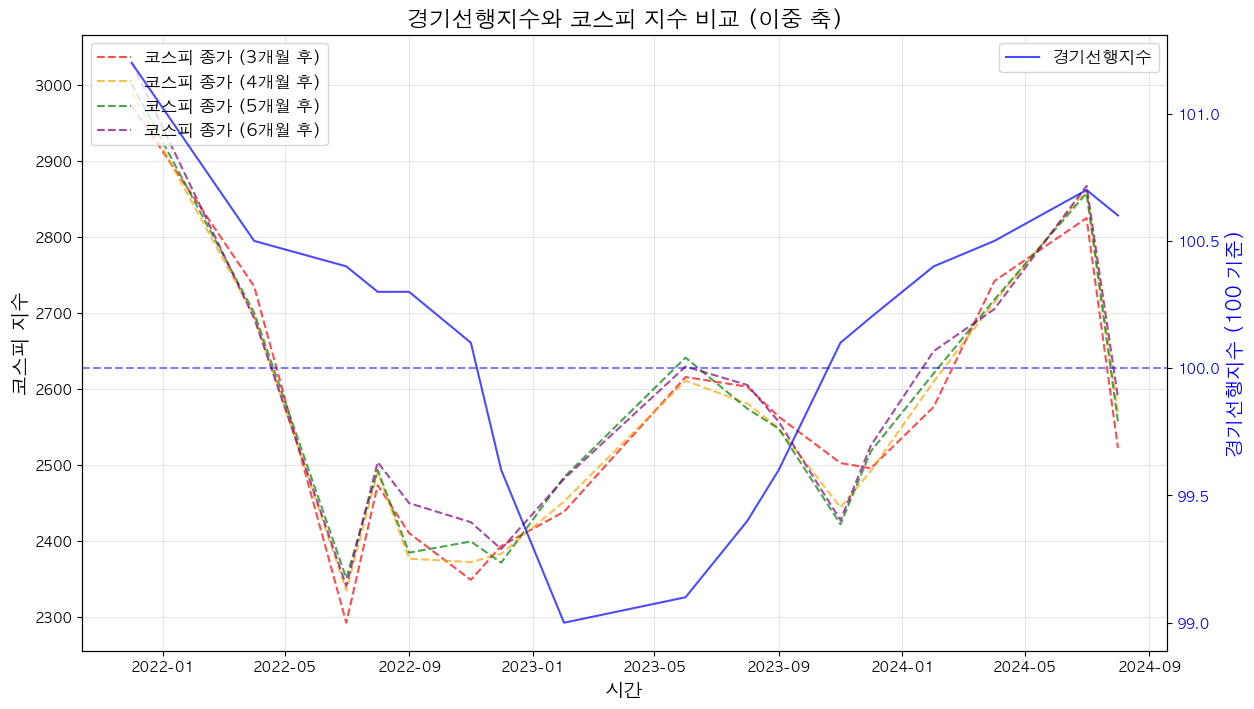

In [25]:
import matplotlib.pyplot as plt

# 1. 시계열 데이터 준비
merged_data = merged_data.sort_values(by="TIME")

# 2. 그래프 설정
fig, ax1 = plt.subplots(figsize=(14, 8))

# 3. 경기선행지수 (오른쪽 축)
ax2 = ax1.twinx()  # 오른쪽 축 생성
ax2.plot(merged_data['TIME'], merged_data['DATA_VALUE'], label="경기선행지수", color="blue", alpha=0.7, linestyle="-")
ax2.set_ylabel("경기선행지수 (100 기준)", fontsize=14, color="blue")
ax2.tick_params(axis="y", labelcolor="blue")
ax2.axhline(y=100, color="blue", linestyle="--", alpha=0.5)  # 100 기준선

# 4. 코스피 종가 (왼쪽 축)
for months, color in zip([3, 4, 5, 6], ["red", "orange", "green", "purple"]):
    ax1.plot(
        merged_data['TIME'],
        merged_data[f'CLOSE_{months}M'],
        label=f"코스피 종가 ({months}개월 후)",
        color=color,
        linestyle="--",
        alpha=0.7
    )

ax1.set_ylabel("코스피 지수", fontsize=14)
ax1.set_xlabel("시간", fontsize=14)
ax1.tick_params(axis="y")
ax1.legend(loc="upper left", fontsize=12)
ax2.legend(loc="upper right", fontsize=12)

# 5. 제목과 그리드 추가
plt.title("경기선행지수와 코스피 지수 비교 (이중 축)", fontsize=16)
ax1.grid(alpha=0.3)

# 6. 그래프 표시
plt.show()


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# 결과 저장을 위한 딕셔너리
regression_results = {}

# 독립 변수 (경기선행지수)
X = merged_data[['DATA_VALUE']]

# 각 종속 변수에 대해 회귀 분석 수행
for months in [3, 4, 5, 6]:
    y = merged_data[f'CLOSE_{months}M']  # 종속 변수 (미래 코스피 종가)
    
    # 결측값 제거
    valid_data = merged_data.dropna(subset=[f'CLOSE_{months}M', 'DATA_VALUE'])
    X_valid = valid_data[['DATA_VALUE']]
    y_valid = valid_data[f'CLOSE_{months}M']
    
    # 회귀 모델 학습
    model = LinearRegression()
    model.fit(X_valid, y_valid)
    
    # 회귀 계수 및 R^2 값 계산
    coef = model.coef_[0]  # 회귀 계수
    intercept = model.intercept_  # 절편
    r2 = model.score(X_valid, y_valid)  # 결정 계수
    
    # 결과 저장
    regression_results[f'{months}개월 후'] = {
        '회귀 계수': coef,
        '절편': intercept,
        'R^2': r2
    }

# 결과 출력
print("회귀 분석 결과:")
for key, result in regression_results.items():
    print(f"{key}: 회귀 계수={result['회귀 계수']:.4f}, 절편={result['절편']:.4f}, R^2={result['R^2']:.4f}")


회귀 분석 결과:
3개월 후: 회귀 계수=131.7547, 절편=-10631.6736, R^2=0.1915
4개월 후: 회귀 계수=145.3089, 절편=-11987.6457, R^2=0.2313
5개월 후: 회귀 계수=138.5144, 절편=-11300.7540, R^2=0.2126
6개월 후: 회귀 계수=145.7567, 절편=-12012.5030, R^2=0.2387


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 시각화 함수 정의
def plot_regression_results(months, X_valid, y_valid, model):
    plt.figure(figsize=(10, 6))
    
    # 실제 데이터 산점도
    plt.scatter(X_valid, y_valid, label="실제 데이터", color="blue", alpha=0.6)
    
    # 회귀 직선
    X_range = np.linspace(X_valid.min(), X_valid.max(), 100).reshape(-1, 1)
    y_pred_line = model.predict(X_range)
    plt.plot(X_range, y_pred_line, label="회귀 직선", color="red", linewidth=2)
    
    # 그래프 꾸미기
    plt.title(f"경기선행지수와 코스피 종가의 회귀 분석 ({months}개월 후)", fontsize=16)
    plt.xlabel("경기선행지수 (DATA_VALUE)", fontsize=14)
    plt.ylabel("코스피 종가", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

# 2. 회귀 분석 결과 시각화
for months in [3, 4, 5, 6]:
    y_valid = merged_data[f'CLOSE_{months}M']  # 종속 변수
    valid_data = merged_data.dropna(subset=[f'CLOSE_{months}M', 'DATA_VALUE'])  # 결측치 제거
    X_valid = valid_data[['DATA_VALUE']]  # 독립 변수
    y_valid = valid_data[f'CLOSE_{months}M']
    
    # 회귀 모델 생성 및 학습
    model = LinearRegression()
    model.fit(X_valid, y_valid)
    

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


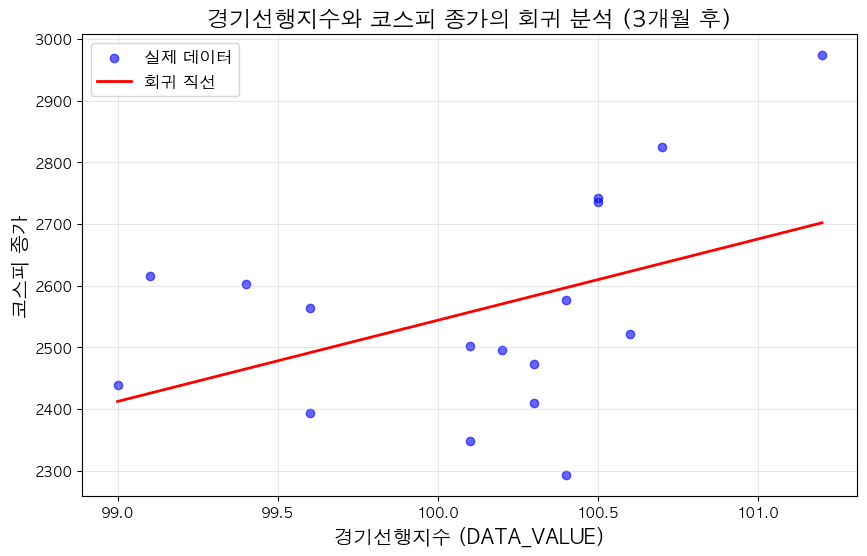

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


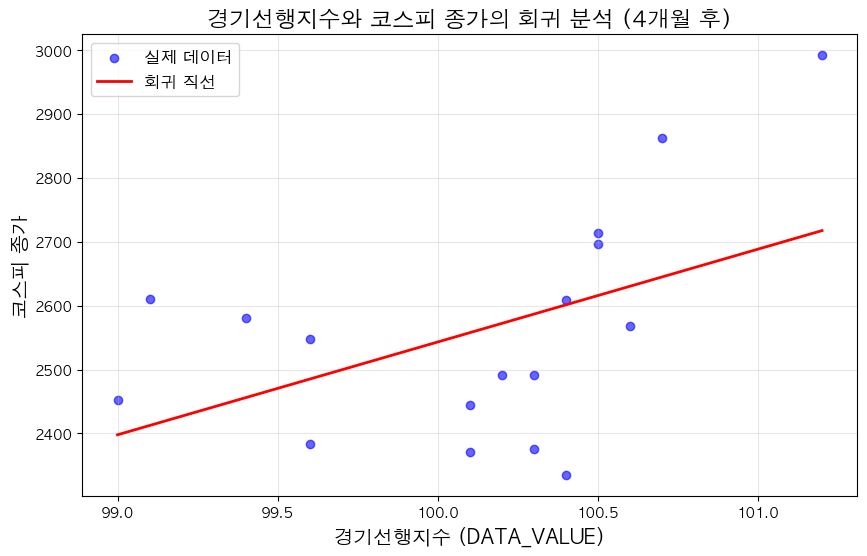

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


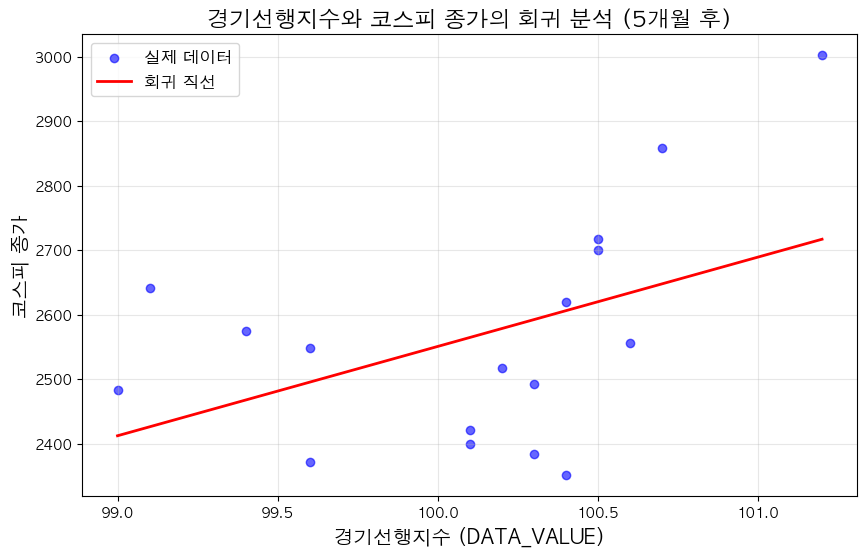

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


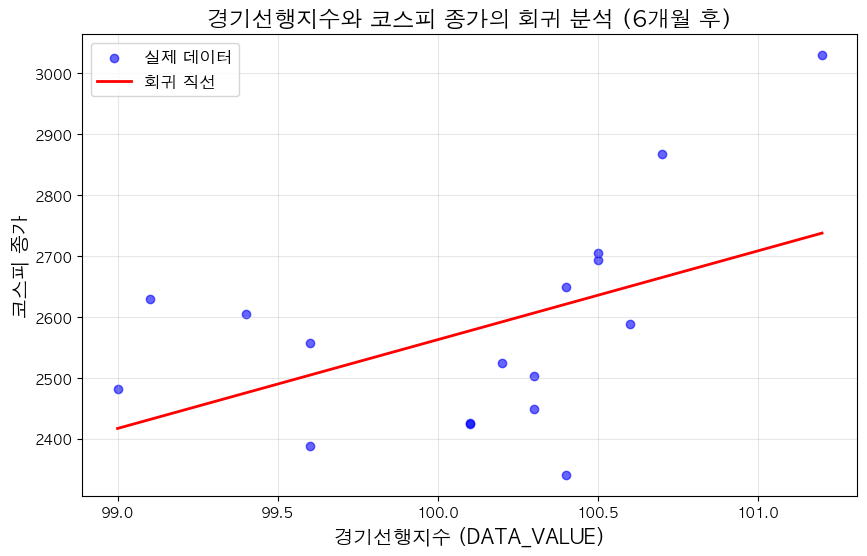

In [ ]:
    # 시각화 함수 호출
    plot_regression_results(months, X_valid, y_valid, model)

In [35]:
from sklearn.metrics import mean_squared_error
import numpy as np

# RMSE 계산 함수
def calculate_rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

# 각 시차에 대해 RMSE 계산
rmse_results = {}

for months in [3, 4, 5, 6]:
    y_valid = merged_data[f'CLOSE_{months}M']  # 종속 변수
    valid_data = merged_data.dropna(subset=[f'CLOSE_{months}M', 'DATA_VALUE'])  # 결측치 제거
    X_valid = valid_data[['DATA_VALUE']]  # 독립 변수
    y_valid = valid_data[f'CLOSE_{months}M']
    
    # 회귀 모델 학습
    model = LinearRegression()
    model.fit(X_valid, y_valid)
    
    # 예측값 생성
    y_pred = model.predict(X_valid)
    
    # RMSE 계산
    rmse = calculate_rmse(y_valid, y_pred)
    rmse_results[f'{months}개월 후'] = rmse

# 결과 출력
print("RMSE 결과:")
for key, value in rmse_results.items():
    print(f"{key}: {value:.4f}")


RMSE 결과:
3개월 후: 155.4595
4개월 후: 152.1140
5개월 후: 153.0446
6개월 후: 149.4492
